In [3]:
import pickle
import numpy as np
import pandas as pd
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('indian_liver_patient.csv', sep=',')
data
# data.info()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
574,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
# showing column wise %ge of NaN values they contains
null_col = []
for i in data.columns:
  print(i,"\t-\t", data[i].isna().mean()*100)
  if data[i].isna().mean()*100 > 0:
    null_col.append(i)

Age 	-	 0.0
Gender 	-	 0.0
Total_Bilirubin 	-	 0.0
Direct_Bilirubin 	-	 0.0
Alkaline_Phosphotase 	-	 0.0
Alamine_Aminotransferase 	-	 0.0
Aspartate_Aminotransferase 	-	 0.0
Total_Protiens 	-	 0.0
Albumin 	-	 0.0
Albumin_and_Globulin_Ratio 	-	 0.0
Dataset 	-	 0.0


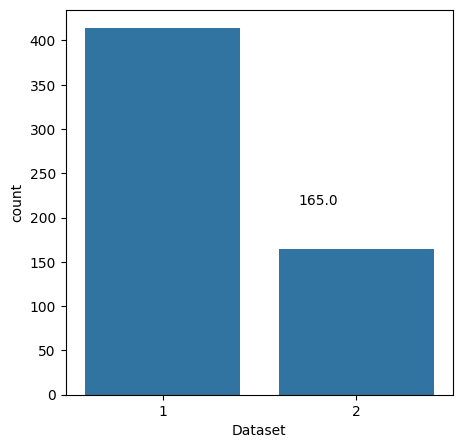

In [6]:
# Checking for unbalanced dataset

plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=data)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [7]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
x, y = oversample.fit_resample(data.drop(['Dataset'], axis=1), data['Dataset'])

new_df = pd.DataFrame(x, columns=data.drop(['Dataset'], axis=1).columns)
new_df['Dataset'] = y

new_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


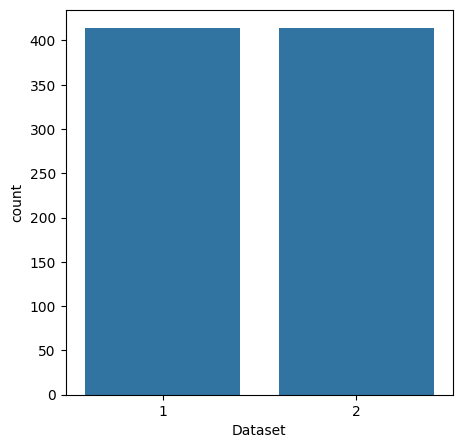

In [8]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='Dataset', data=new_df)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [9]:
new_df.shape

(828, 11)

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         828 non-null    int64  
 1   Gender                      828 non-null    int64  
 2   Total_Bilirubin             828 non-null    float64
 3   Direct_Bilirubin            828 non-null    float64
 4   Alkaline_Phosphotase        828 non-null    int64  
 5   Alamine_Aminotransferase    828 non-null    int64  
 6   Aspartate_Aminotransferase  828 non-null    int64  
 7   Total_Protiens              828 non-null    float64
 8   Albumin                     828 non-null    float64
 9   Albumin_and_Globulin_Ratio  828 non-null    float64
 10  Dataset                     828 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 71.3 KB


In [11]:
for i in new_df.select_dtypes(include=['object']).columns:
  new_df[i] = new_df[i].astype(str).astype(float)

<Axes: >

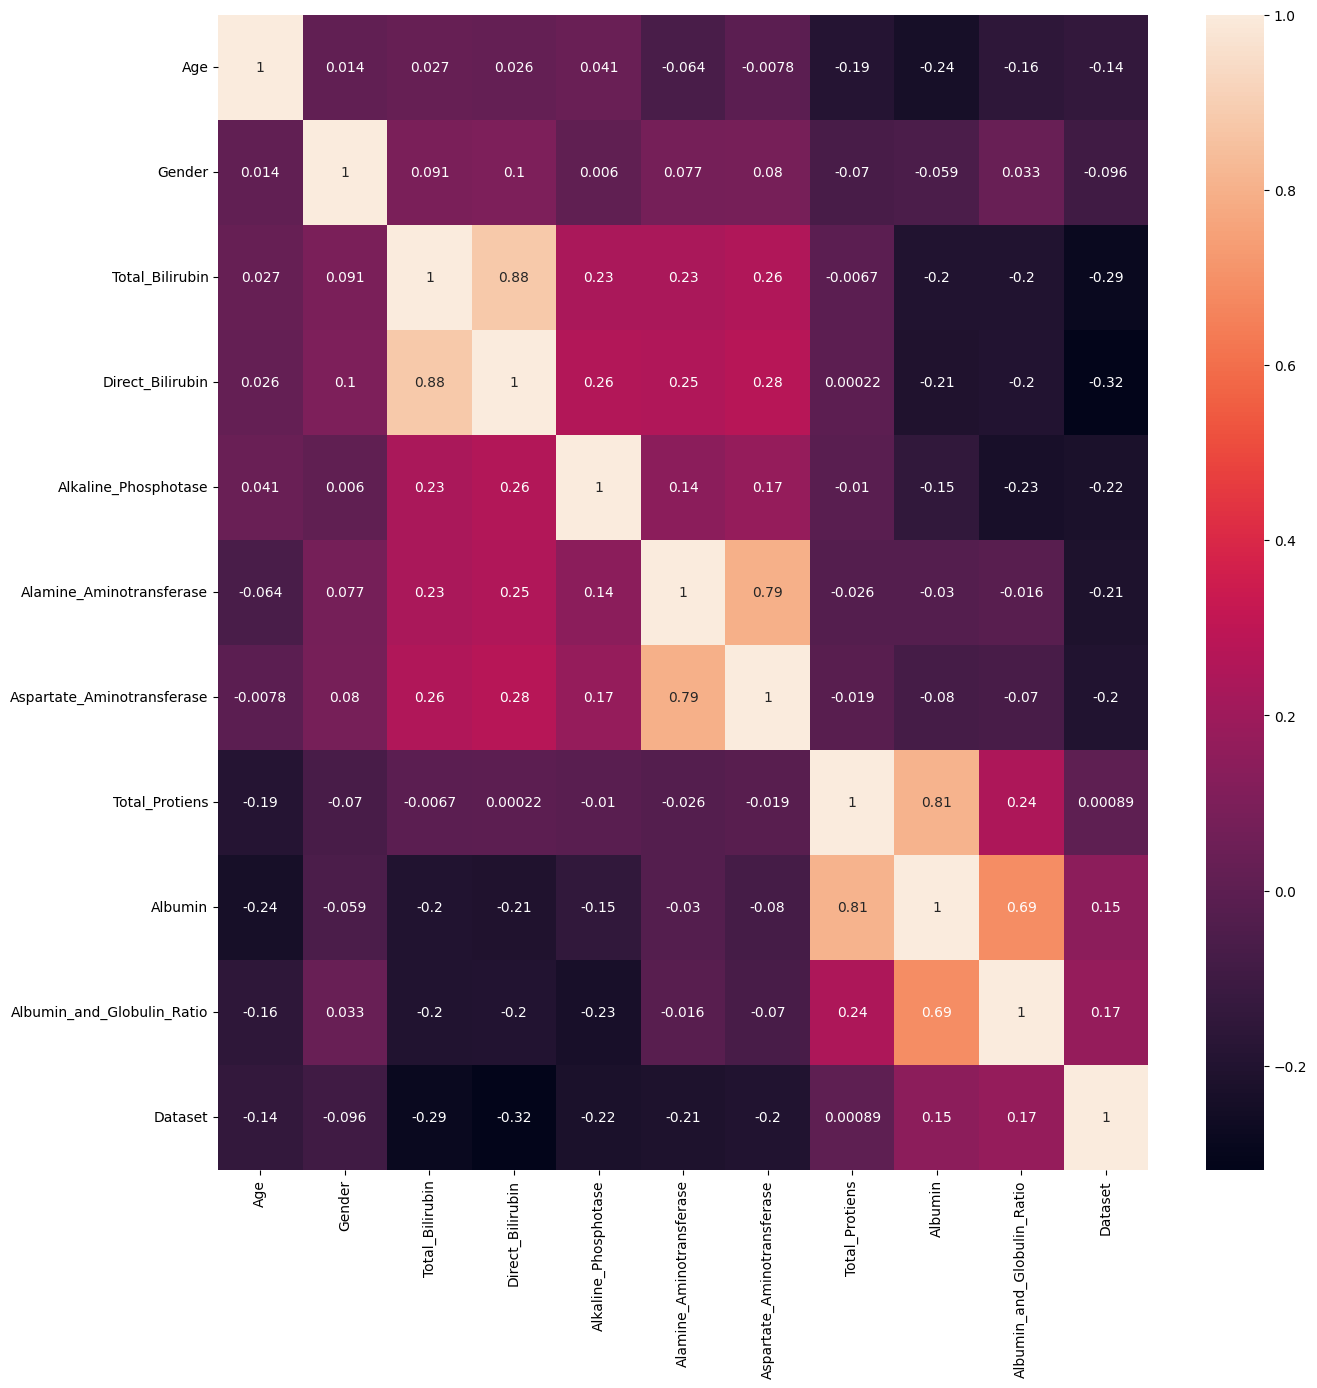

In [12]:
cormap = new_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormap, annot = True)

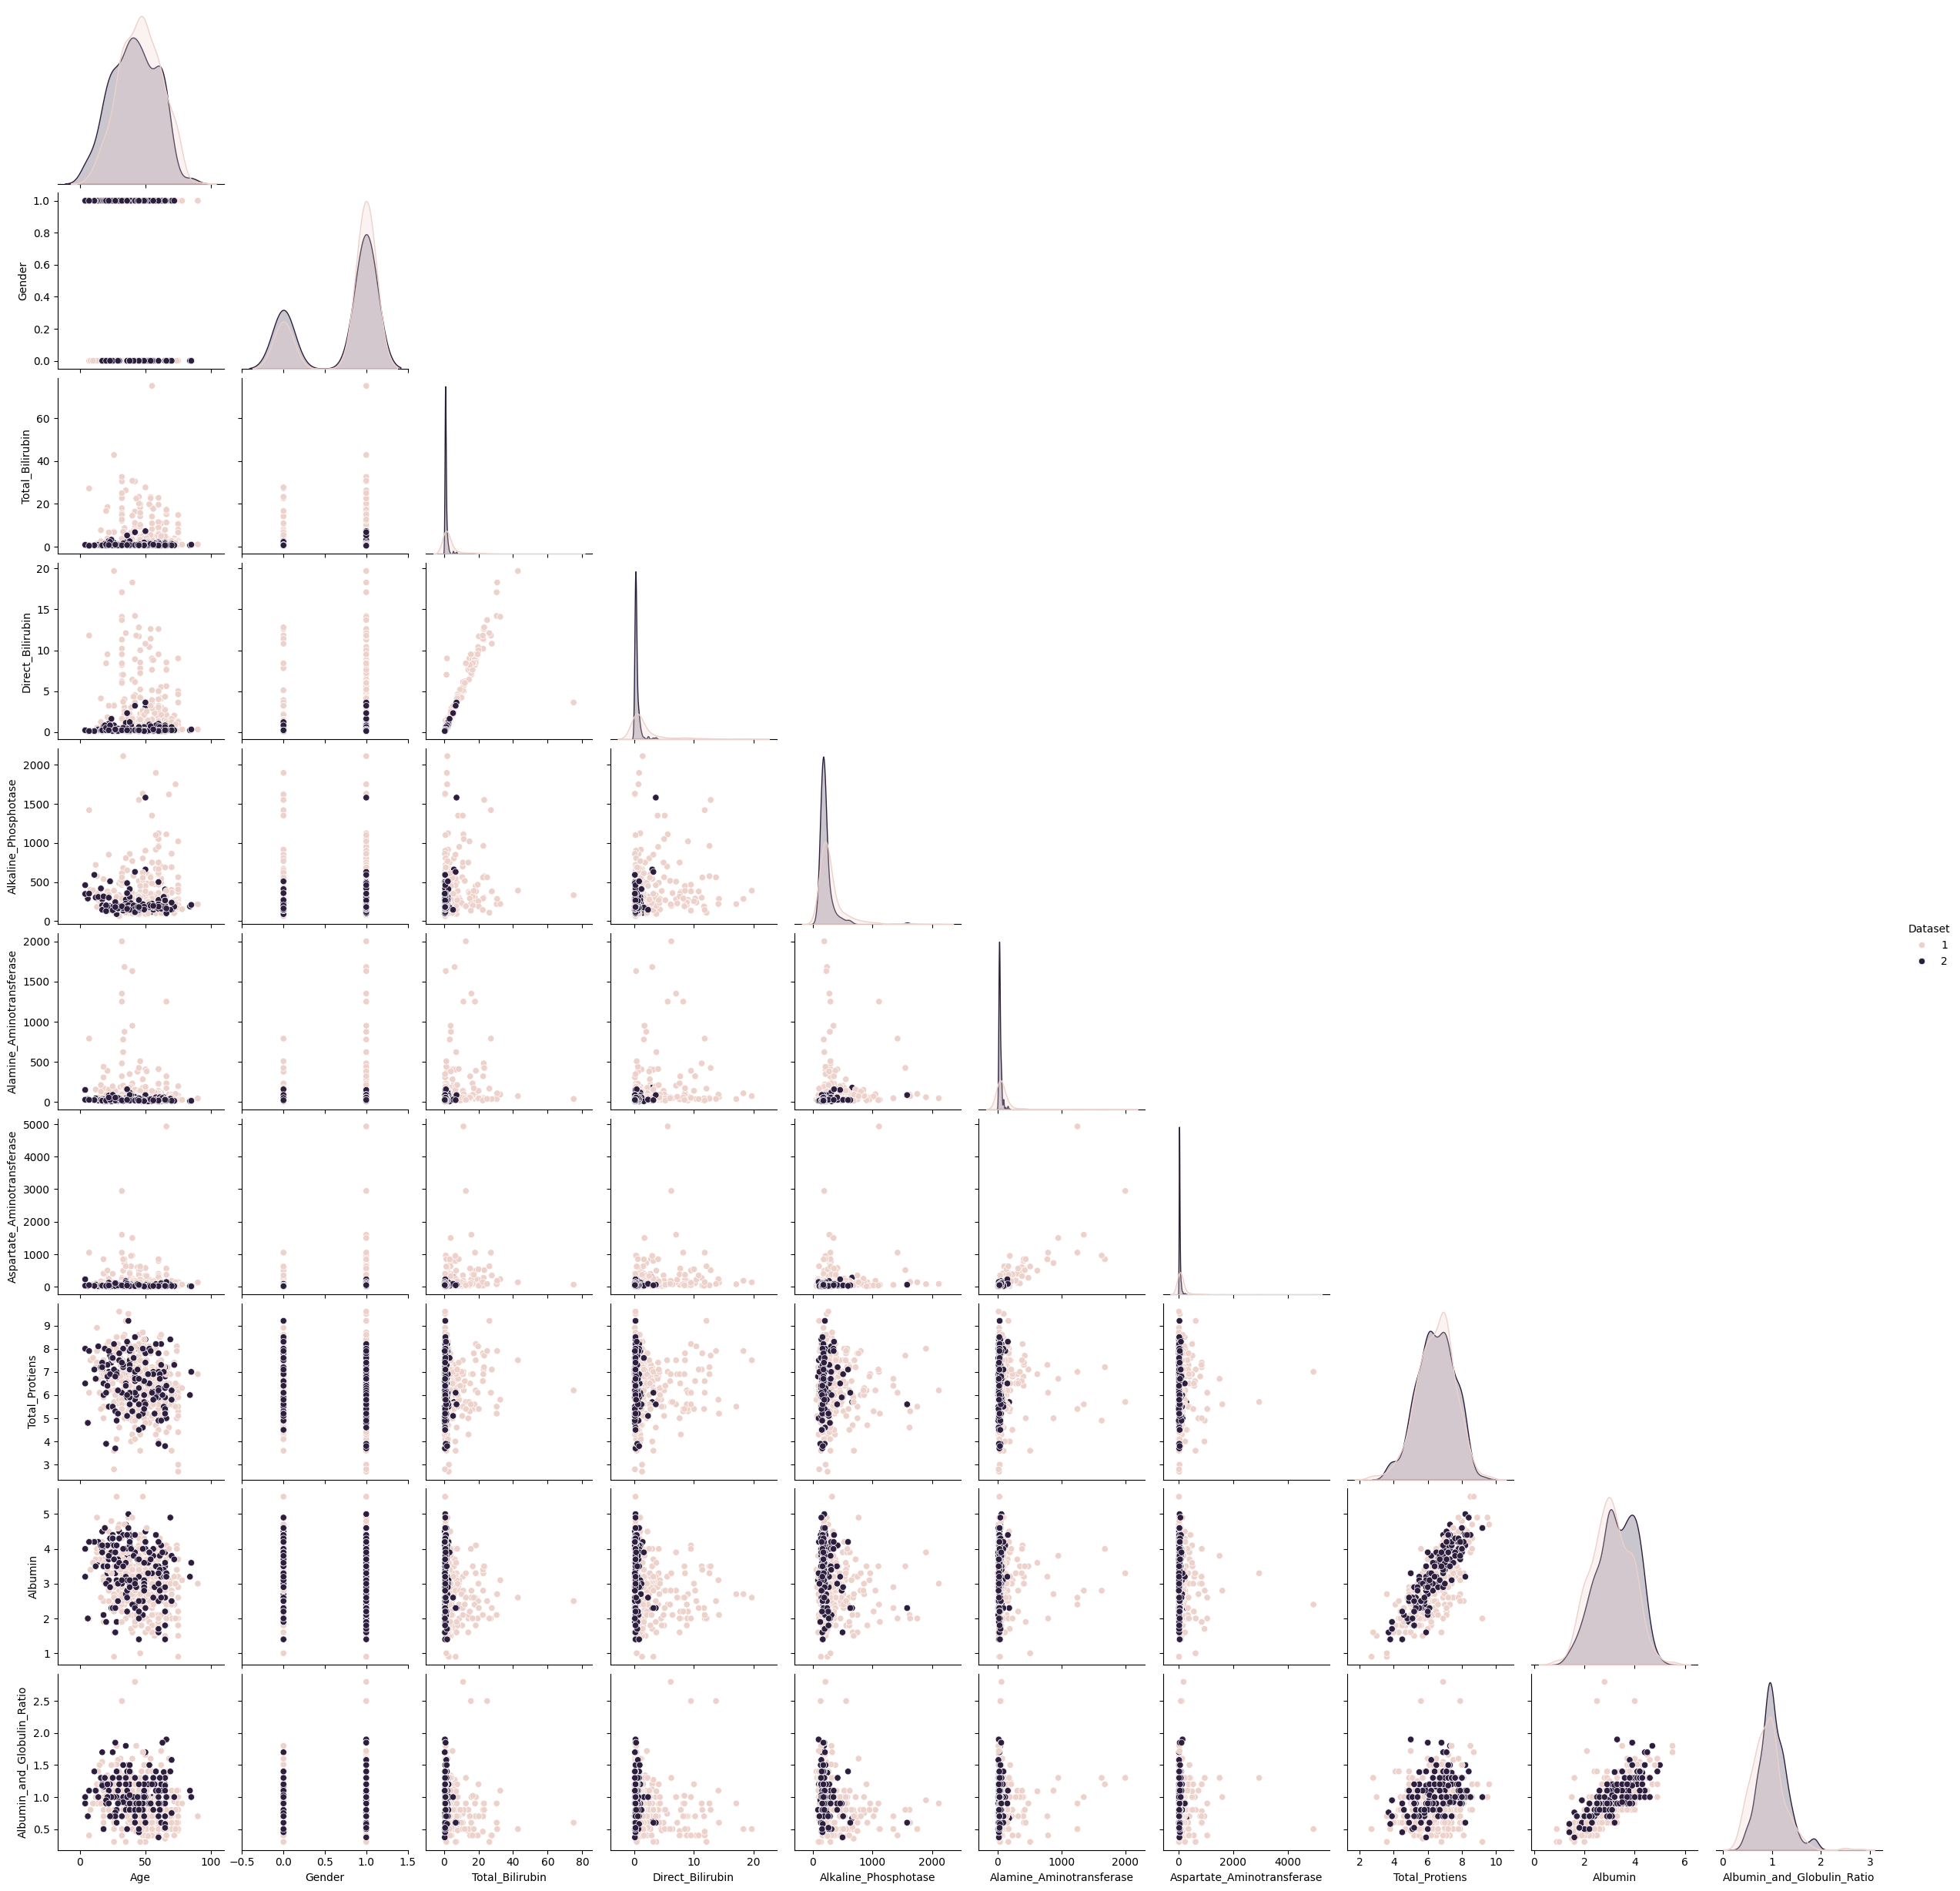

In [13]:
sns.pairplot(data=new_df, hue='Dataset', corner=True)

KNN (pake kaggle)

In [14]:
X = new_df.drop(['Dataset'], axis=1)
y = new_df['Dataset']

In [15]:
# Scale the data to be between -1 and 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.276792,-1.677995,-0.366629,-0.437111,-0.374191,-0.328241,-0.288517,0.313337,0.161684,-0.219837
1,1.096200,0.595949,1.548631,1.791917,1.929712,-0.018737,0.046312,0.957801,0.034063,-0.743839
2,1.096200,0.595949,0.872657,1.214021,0.989252,-0.044529,-0.084353,0.497469,0.161684,-0.252587
3,0.855411,0.595949,-0.310298,-0.313276,-0.396690,-0.341137,-0.280351,0.313337,0.289304,0.107664
4,1.698172,0.595949,0.234237,0.347176,-0.338192,-0.257313,-0.121103,0.773668,-0.986902,-1.857343


In [16]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [17]:
# model training 

from sklearn.neighbors import KNeighborsClassifier as KNN

model= KNN()   
model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [19]:
from sklearn.model_selection import GridSearchCV
n_neighbors = [x for x in range(1, 11, 2)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']

grid = {'n_neighbors': n_neighbors,
        'algorithm': algorithm,
        'weights': weights}

In [20]:


new_model = KNN() 

knn_grid = GridSearchCV(estimator = new_model, param_grid = grid, cv = 7, verbose=0)
knn_grid.fit(X_train, y_train)



GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [21]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [22]:
y_pred = knn_grid.best_estimator_.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df

,Actual,Predicted
701,2,2
479,2,2
752,2,2
424,2,1
56,2,2
...,...,...
642,2,2
756,2,1
402,2,2
764,2,2


<Axes: >

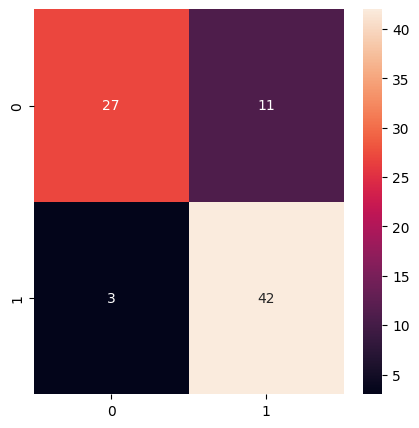

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot = True)

In [24]:
# FOLD = 10
kfold = KFold(n_splits=7)
scores = ['accuracy', 'precision', 'recall']
results = cross_validate(knn_grid, X_test, y_test, cv=kfold, scoring=scores, return_train_score=True)
results_data_1 = pd.DataFrame(results)
# results_data_1

In [25]:
print("PERFORMANCE MODEL KNN")

accuracy = results_data_1.test_accuracy.mean() * 100
precision = results_data_1.test_precision.mean() * 100
recall = results_data_1.test_recall.mean() * 100

print("Accuracy : %0.2f" % accuracy, "%")
print("Precision : %0.2f " % precision, "%")
print("Recall : %0.2f " % recall, "%")

PERFORMANCE MODEL KNN
Accuracy : 65.26 %
Precision : 71.43  %
Recall : 45.05  %


In [26]:
from sklearn import metrics

# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(y_pred, y_test)*100))
print("Precision score of the predictions: {value:.2f} %".format(value=metrics.precision_score(y_pred, y_test)*100))

Accuracy score of the predictions: 83.13 %
Precision score of the predictions: 71.05 %


In [27]:
# AMBIL LABEL SETIAP BARIS
label = data.iloc[:,-1:].values.ravel()
label

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,

In [28]:
# AMBIL FEATURE DATA
feature = data.iloc[:,:-1]
feature.values

array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [29]:
# PEMBAGIAN DATA LATIH DAN DATA UJI SEBANYAK 80% UNTUK DATA LATIH 20% UNTUK DATA TEST
X_train, X_test, y_train, y_test = train_test_split(feature, label ,test_size=0.3)

In [30]:
print("Jumlah Data Latih:", len(X_train))
print("Jumlah Data Uji:", len(X_test))

Jumlah Data Latih: 405
Jumlah Data Uji: 174


In [31]:
# PEMODELAN MENGGUNAKAN KNN
clf = KNeighborsClassifier(n_neighbors=3)

# FITTING DATA TRAINING
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
pred = clf.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1],
      dtype=int64)

In [33]:
cols = {
    'Y True' : y_test,
    'Predict' : pred,
}

print("Prediksi Yang Dihasilkan")
pd.DataFrame(cols)

Prediksi Yang Dihasilkan


,Y True,Predict
0,1,1
1,1,1
2,2,1
3,1,1
4,1,1
...,...,...
169,1,2
170,1,1
171,1,1
172,1,1


In [34]:
# FOLD = 10
kfold = KFold(n_splits=10)
scores = ['accuracy', 'precision', 'recall']
results = cross_validate(clf, X_test, y_test, cv=kfold, scoring=scores, return_train_score=True)
results_data = pd.DataFrame(results)
results_data

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.003004,0.008997,0.888889,0.820513,1.000000,0.872881,0.866667,0.887931
1,0.001999,0.007004,0.722222,0.865385,0.705882,0.895161,1.000000,0.932773
2,0.003000,0.007998,0.722222,0.871795,0.733333,0.896000,0.916667,0.941176
3,0.002997,0.009003,0.833333,0.852564,0.866667,0.891667,0.928571,0.914530
4,0.001989,0.007000,0.588235,0.878981,0.666667,0.910569,0.727273,0.933333
5,0.004983,0.011997,0.705882,0.859873,0.785714,0.893443,0.846154,0.923729
6,0.002000,0.008004,0.705882,0.853503,0.909091,0.885246,0.714286,0.923077
7,0.002001,0.013003,0.705882,0.872611,0.800000,0.894309,0.857143,0.940171
8,0.002002,0.012994,0.705882,0.866242,0.900000,0.894309,0.692308,0.932203
9,0.007001,0.019003,0.882353,0.828025,0.923077,0.864000,0.923077,0.915254


In [35]:
print("PERFORMANCE MODEL KNN")

accuracy = results_data.test_accuracy.mean() * 100
precision = results_data.test_precision.mean() * 100
recall = results_data.test_recall.mean() * 100

print("Accuracy : %0.2f" % accuracy, "%")
print("Precision : %0.2f " % precision, "%")
print("Recall : %0.2f " % recall, "%")

PERFORMANCE MODEL KNN
Accuracy : 74.61 %
Precision : 82.90  %
Recall : 84.72  %


In [36]:
from sklearn import metrics

# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(pred, y_test)*100))
print("Precision score of the predictions: {value:.2f} %".format(value=metrics.precision_score(pred, y_test)*100))

Accuracy score of the predictions: 68.97 %
Precision score of the predictions: 80.15 %


In [37]:
pickle.dump(clf, open('model_baru.pkl','wb'))